# Determine peptide length distribution

4301
highest value: 460
argmax: 9


(array([  0.,   0.,   0.,   0.,   2.,  71., 186., 318., 388., 460., 389.,
        438., 412., 307., 277., 240., 178., 153., 107.,  89.,  68.,  51.,
         44.,  39.,  22.,  23.,  18.,   6.,   5.,   6.,   1.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 39 Patch objects>)

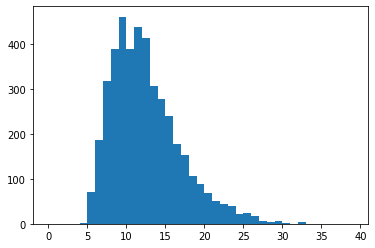

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np

sequence_col = 'Peptide'
score_col = 'Denovo Score'
length_col = 'Tag Length'

def load_experiment_file(file):
    return pd.read_csv(file)

# load the file
experiment_file = '/Users/zacharymcgrath/Downloads/de novo peptides (1).csv'
df = load_experiment_file(experiment_file)

# get length information
lengths = list(df[length_col])
print(len(lengths))
length_data = [0 for x in range(max(lengths) + 1)]
for x in lengths:
    length_data[x] += 1
    
print('highest value: {}'.format(max(length_data)))
print('argmax: {}'.format(np.argmax(length_data)))
# plot histogram of the length data
plt.hist(lengths, bins=range(0, 40))

    

6116
highest value: 448
argmax: 12


(array([  0.,   0.,   0.,   0.,   6.,  70., 243., 414., 416., 432., 429.,
        431., 448., 377., 318., 308., 263., 202., 152., 168., 152., 396.,
        220., 119.,  81.,  78.,  60.,  54.,  51.,  56.,  63.,  48.,  30.,
         14.,   5.,   6.,   2.,   1.,   3.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 39 Patch objects>)

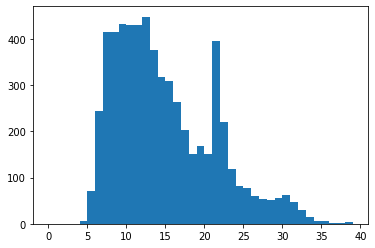

In [38]:
# filter out scores < thresh
thresh = 49

lengths = list(df.loc[df[score_col] > thresh][length_col])

# get length information
print(len(lengths))
length_data = [0 for x in range(max(lengths) + 1)]
for x in lengths:
    length_data[x] += 1
    
print('highest value: {}'.format(max(length_data)))
print('argmax: {}'.format(np.argmax(length_data)))
# plot histogram of the length data
plt.hist(lengths, bins=range(0, 40))

(array([  0.,   0.,   0.,  49., 170., 255., 312., 386., 355., 406., 367.,
        310., 252., 242., 207., 168., 135., 108.,  96.,  54.,  47.,  26.,
         15.,  16.,   4.,   9.,   4.,   4.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 36 Patch objects>)

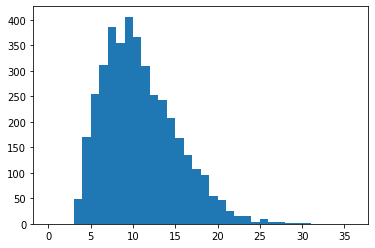

In [76]:
a = 2.3
b = 7
x = 3
y = 35
z = x + (np.random.beta(a, b, size=(4000)) * (y - x))
plt.hist(z, bins=range(0, 37))

# Verify Peptide length distribution

(array([  0.,   0.,   0.,   0.,  67., 279., 397., 546., 611., 613., 654.,
        602., 510., 427., 398., 300., 273., 186., 175., 109.,  82.,  55.,
         49.,  29.,  15.,   7.,   4.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 37 Patch objects>)

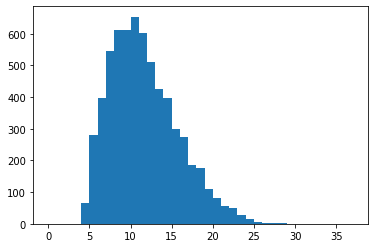

In [88]:
import json

exp_json_file = '/Users/zacharymcgrath/Desktop/Experiment output/TEST DISTRIBUTION GEN/experiment_data.json'
exp = json.load(open(exp_json_file, 'r'))

peps = exp['experiment_info']['peptides']
ls = [len(x['peptide_sequence']) for x in peps]
plt.hist(ls, bins=range(0, 38))